In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

## SIR Model

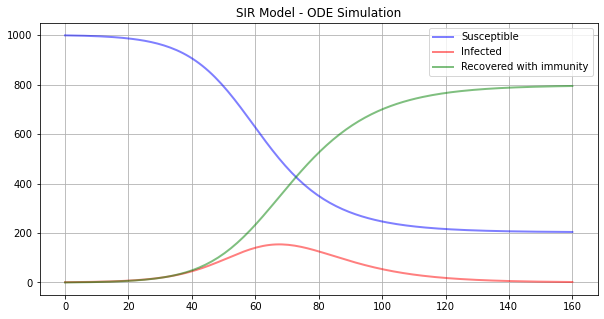

In [21]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

N = 1000
I0, R0 = 1, 0
S0 = N - I0 - R0
beta, gamma = 0.2, 1./10 
t = np.linspace(0, 160, 160)

y0 = S0, I0, R0

ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

fig, ax = plt.subplots(figsize = (10,5))
ax.set_title(f'SIR Model - ODE Simulation')
ax.plot(t, S, 'b-', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I, 'r-', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R, 'g-', alpha=0.5, lw=2, label='Recovered with immunity')
ax.legend()
ax.grid()
plt.show()

## SEIAR Model

In [4]:
H = 1000

In [22]:
# set initial condition
I0_HI = 1
I0_LI = 10
A0_HI = 1
A0_LI = 10
R0 = 0
E0 = 2
S0 = H - I0_LI - I0_HI - A0_HI - A0_LI - R0 - E0

beta_IH, beta_AH = 0.5, 0.45 # transmission rate 
gamma = 0.2 # incubation rate
theta = 0.3 # proportion showing symptom
lam = 0.7 # infection period (1/lambda)
delta = 0.1 # death rate per day
t = np.linspace(0, 50, 50)

# define ODE system
def deriv_High(y, t, beta_IH, beta_AH, gamma, theta, lam, delta):

    S_HI, E_HI, I_HI, I_LI, A_HI, A_LI = y

    dSdt = -1 * S_HI * (beta_IH * (I_HI + I_LI) + beta_AH * (A_HI + A_LI))
    dEdt = (S_HI * (beta_IH * (I_HI + I_LI) + beta_AH * (A_HI + A_LI))) - gamma * E_HI
    dIdt = (theta * gamma * E_HI) - (lam * I_HI) - (delta * I_HI)
    dAdt = ((1 - theta) * gamma * E_HI) - (lam * A_HI)
    dRdt = lam * (I_HI + A_HI)

    return dSdt, dEdt, dIdt, dAdt, dRdt

# combine initial condition
y0 = S0, E0, I0_HI, I0_LI, A0_HI, A0_LI

# solve ODE
ret = odeint(deriv_High, y0, t, args=(beta_IH, beta_AH, gamma, theta, lam, delta))
S, E, I, A, R = ret.T

# plot ODE
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title(f'SEIAR Model - ODE Simulation')
ax.plot(t, S, 'b-', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E, 'g-', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I, 'r-', alpha=0.5, lw=2, label='Symptomatic')
ax.plot(t, A, 'm-', alpha=0.5, lw=2, label='Asymptomatic')
ax.plot(t, R, 'y-', alpha=0.5, lw=2, label='Recovered')
ax.legend()
ax.grid()
plt.show()

RuntimeError: The size of the array returned by func (5) does not match the size of y0 (6).